In [1]:
%matplotlib inline

from absorbed_dose_lib_2 import *

In [2]:
# Defined materials:
paraffin = Material(name="Paraffin_Wax", density=0.9, stopping_power="file", file="./Data/paraffin_proton_stopping_data.csv")
water = Material(name="Water", density=0.997, stopping_power="file", file="./Data/water_proton_stopping_data.csv")
air = Material(name="Air", density=1.225e-3, stopping_power="file", file="./Data/air_proton_stopping_data.csv")
aluminum = Material(name="Aluminum", density=2.7, stopping_power="file", file="./Data/aluminum_proton_stopping_data.csv")
copper = Material(name="Copper", density=8.96, stopping_power="file", file="./Data/copper_proton_stopping_data.csv")
iron = Material(name="Iron", density=7.874, stopping_power="file", file="./Data/iron_proton_stopping_data.csv")
lead = Material(name="Lead", density=11.34, stopping_power="file", file="./Data/lead_proton_stopping_data.csv")

In [3]:
#Irradiation Dose
irradiation_dose = 5 #Gy
irradiated_elements_names = ["Cell Layer"]

#Beam Configuration:
beam_energy = 10.0#MeV
beam_current = 15.0*1.0e-3#*(1.0/25.0) #nA
beam_diameter = 3.0 #mm

# Elements in the experiment:
experiment_name = "Paraffin and Cells"
names = []
materials = []
lengths = []
colors = []

#First Element
#names.append("Air Layer")
#Material
#materials.append(air)
#Length
#lengths.append(1.0*centimeter)
#Plot color
#colors.append('b')

##Second element
names.append("Aluminum")
#Material
materials.append(aluminum)
#Length
lengths.append(2.0*milimeter)
#Plot color
colors.append('y')

##Third element
names.append("Cell Layer")
#Material
materials.append(water)
#Length
lengths.append(20.0*micrometer)
#Plot color
colors.append('m')

##Add as many elements as needed

#Other options
plot_let_data = True
explore_current_interval = False
explore_energy_interval = False
save_results = False

#Other input
integration_density = 1e5 #points/(g/cm2)
outputfile = "./results.txt"
current_interval = np.logspace(-3, 1, 20)
energy_interval = np.linspace(1.0, 10.0, 20)

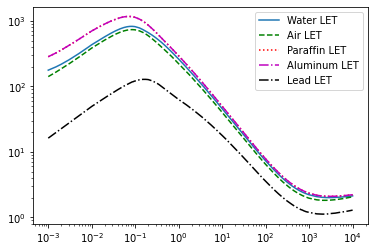

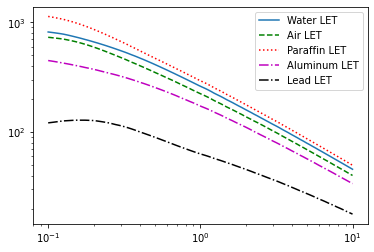

Experiment Configuration:
Irradiation Dose: 5 Gy
Beam Energy: 10.0 MeV
Beam Current: 15.0 pA
Beam Diameter: 3.0 mm
Beam Area: 0.07068583470577035 cm2
Aluminum 2000.0 micrometers 54000 points
Aluminum dx =  0.037037037037037035 micrometers
Cell Layer 20.0 micrometers 199 points
Cell Layer dx =  0.10030090270812436 micrometers
Total Length:  2020.0 micrometers
Aluminum 54000 points.

---------------------------------------
Aluminum recibed a dose of 3.9297551631679615 Gy per second
Aluminum recibed a mean dose of 3.929751681281366 Gy per second
Aluminum first point recibed a microdose of 7.17258276867475 Gy per second
Aluminum last point recibed a microdose of 22.32199988933189 Gy per second
Aluminum deposited energy per proton:  10.000008860322174 MeV
Cell Layer recibed a dose of 0.0 Gy per second
Cell Layer recibed a mean dose of 0.0 Gy per second
Cell Layer first point recibed a microdose of 0.0 Gy per second
Cell Layer last point recibed a microdose of 0.0 Gy per second
Cell Layer de

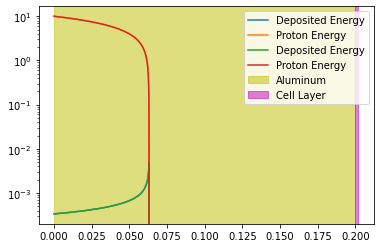

In [4]:
# Plot LET data
if plot_let_data:
    plt.loglog(water.energies, water.stopping_power(water.energies), label="Water LET")
    plt.loglog(air.energies, air.stopping_power(water.energies), "g--", label="Air LET")
    plt.loglog(paraffin.energies, paraffin.stopping_power(paraffin.energies), "r:", label="Paraffin LET")
    plt.loglog(aluminum.energies, paraffin.stopping_power(aluminum.energies), "m-.", label="Aluminum LET")
    plt.loglog(lead.energies, lead.stopping_power(lead.energies), 'k-.', label="Lead LET")
    plt.legend()
    plt.show()

    my_energies = np.logspace(-1.0, 1.0, 100 )
    plt.loglog(my_energies, water.stopping_power(my_energies), label="Water LET")
    plt.loglog(my_energies, air.stopping_power(my_energies), "g--", label="Air LET")
    plt.loglog(my_energies, paraffin.stopping_power(my_energies), "r:", label="Paraffin LET")
    plt.loglog(my_energies, aluminum.stopping_power(my_energies), "m-.", label="Aluminum LET")
    plt.loglog(my_energies, lead.stopping_power(my_energies), 'k-.', label="Lead LET")
    plt.legend()
    plt.show()
    
# My Experiment
elements = []
for i in range(len(names)):
    elements.append(GeometricalElement(name=names[i], length=lengths[i], material=materials[i], color=colors[i]))
my_beam = Beam(energy=beam_energy, intensity=beam_current, diameter=beam_diameter)
my_experiment = Experiment(name=experiment_name, beam=my_beam, elements=elements,
                           irradiation_dose=irradiation_dose, irradiated_elements_names=irradiated_elements_names)
my_experiment.compute(integration_density)
my_experiment.show_results(my_experiment.elements[0:])

In [5]:
max_deposited_energy = max(my_experiment.deposited_energy_rates)
max_index = my_experiment.deposited_energy_rates.index(max_deposited_energy)
bragg_peak = my_experiment.energies[max_index]
print("Bragg Peak Position:", bragg_peak*1.0e3, "keV")
#print("Bragg Peak Height:", max_deposited_energy*1.0e3, "keV")

Bragg Peak Position: 53.05090041072346 keV
